In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import swifter  # making the iterations faster (I hope)

In [2]:
# importing data
df = pd.read_csv("twitter_fetch - Copy.csv")
df.head().T

,0,1,2,3,4
Text,RT @hudson_tamara Is there any chance one of t...,RT @7NewsMelbourne More than 1000 Volkswagen G...,RT @ScientistRebel1 After a protest in the lux...,RT @RayyLH44 RedBull has the best car they’ve ...,RT @7NewsMelbourne More than 1000 Volkswagen G...
TweetCreatedAt,11/01/2022,11/01/2022,11/01/2022,11/01/2022,11/01/2022
RetweetCount,766,4,148,127,4
LikeCount,0,0,0,0,0
ReplyCount,0,0,0,0,0
AuthorID,1543082477065015296,1255848224574763009,184282465,1544800667423891462,1257455326342729728
ScreenName,Carol Azrynna,News Sound Bites,Lady ApaulD,DFL Penguin 44,tariq
UserName,AzrynnaCarol,bites_sound,apaul57,DflPenguin,testok51981
UserProfile,NaN,A 🤖 curating news that keeps you informed with...,Photographer 📷 Street gardener🦜art 🎨let’s stop...,NaN,Working for the speaker network. visit our you...
Following,25,18,943,117,532


In [3]:
# function to get basic information about the data
def basic_info (df):
    '''
    Docstring: getting basic information
        1. number of unique values in each variable
        2. the type of values each feature has
        3. number of missing values in each feature
        4. number of missing values in each feature (%)
    '''
    
    feat_int = 0
    feat_float = 0
    feat_cat = 0
    value_count_dict = {}
    
    for i in df:
        '''
        1. create a dict [unique val, type, missing val]
        2. count num of feat types
        '''
        if df[i].dtype == "O":
            value_count_dict[i] = [len(df[i].value_counts()), "Obj", df[i].isna().sum()]
            feat_cat += 1
        elif df[i].dtype == "int64":
            value_count_dict[i] = [len(df[i].value_counts()), "int", df[i].isna().sum()]
            feat_int += 1
        else:
            value_count_dict[i] = [len(df[i].value_counts()), "float", df[i].isna().sum()]
            feat_float += 1

    # feat in total
    total_feat_num = sum([feat_int, feat_float, feat_cat])  

    # print 
    print(f"{feat_int} features are integer type")
    print(f"{feat_float} features are float type")
    print(f"{feat_cat} features are object type")
    print(f"{total_feat_num} Total features")
    print(f"{len(df)} Observations")

    # create df
    value_info = pd.DataFrame(value_count_dict)

    # rename cols
    value_info = value_info.T.rename(columns={0: "Unique Values", 1: "Type", 2: "Missing_num"}) 

    # add col with percentage of missing values
    value_info["Missing_%"] = list(map(lambda x: str(round(x/len(df)*100, 3)) + "%", 
                                   list(value_info["Missing_num"])))


    return value_info


basic_info(df)

8 features are integer type
0 features are float type
9 features are object type
17 Total features
20622 Observations


,Unique Values,Type,Missing_num,Missing_%
Text,10574,Obj,0,0.0%
TweetCreatedAt,6,Obj,0,0.0%
RetweetCount,125,int,0,0.0%
LikeCount,194,int,0,0.0%
ReplyCount,49,int,0,0.0%
AuthorID,16130,int,0,0.0%
ScreenName,15753,Obj,3,0.015%
UserName,16130,Obj,0,0.0%
UserProfile,12794,Obj,3773,18.296%
Following,3618,int,0,0.0%


## Looking at the `Kind` of tweets in the data

**Note: 25.512% of the data is missing**

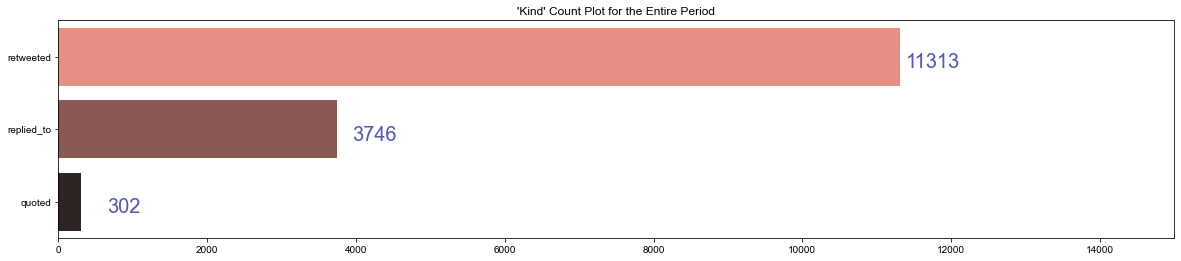

In [4]:
# Visualizing
annot_place_1 = 60
annote_place_2 = -40
figure, ax = plt.subplots(figsize = (20, 4))
ax = sns.countplot(data = df, y = "Kind", palette = "dark:salmon_r", order = df.Kind.value_counts().index)
ax.set_xlim(0, 15000)
ax.set(ylabel = None, xlabel = None)
plt.title(f"'Kind' Count Plot for the Entire Period")
sns.set(font_scale = 1.35)

for p in ax.patches:
    ax.annotate(int(p.get_width()),((p.get_x() + p.get_width()) , p.get_y()), xytext=(annot_place_1, annote_place_2),
                fontsize = 20,color = "#5257B9", textcoords = 'offset points', horizontalalignment = 'right')
        
plt.show();

## Looking at the Number of tweets fro each day

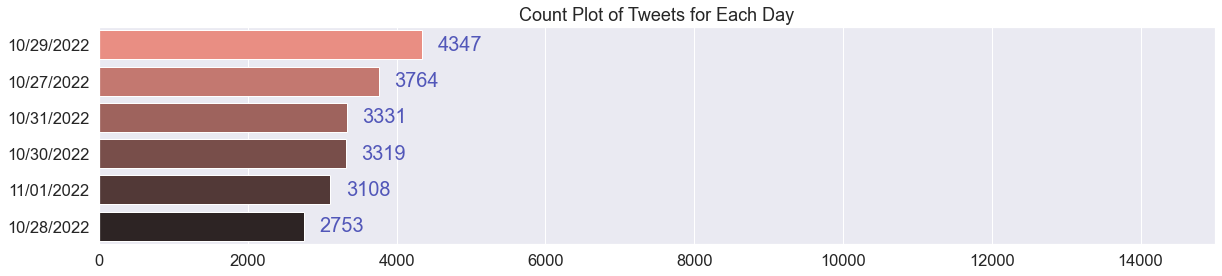

In [59]:
# Visualizing 

annot_place_1 = 60
annote_place_2 = -20
figure, ax = plt.subplots(figsize = (20, 4))
ax = sns.countplot(data = df, y = "TweetCreatedAt", palette = "dark:salmon_r", order = df.TweetCreatedAt.value_counts().index)
ax.set_xlim(0, 15000)
ax.set(ylabel = None, xlabel = None)
plt.title(f"Count Plot of Tweets for Each Day")
sns.set(font_scale = 1.50)

for p in ax.patches:
    ax.annotate(int(p.get_width()),((p.get_x() + p.get_width()) , p.get_y()), xytext=(annot_place_1, annote_place_2),
                fontsize = 20,color = "#5257B9", textcoords = 'offset points', horizontalalignment = 'right')
        
plt.show();

In [6]:
# checking if there is a significant difference between the days and number of tweets
#    H0: There is no significant difference in distribution of tweets between each day
#    Ha: There is a significant difference in distribution of tweets between each day
import scipy.stats as stats
goodness_text = stats.chisquare(df.TweetCreatedAt.value_counts().values)
goodness_text

Power_divergenceResult(statistic=446.9845795752109, pvalue=2.196347069349957e-94)

**Based on the result above `((df = 1, N = 20622)= 446.99; p = 0.001)` we can drop H0. Meaning there is a significant difference between the number of tweets in each day**

## Looking at the type of tweet for each day

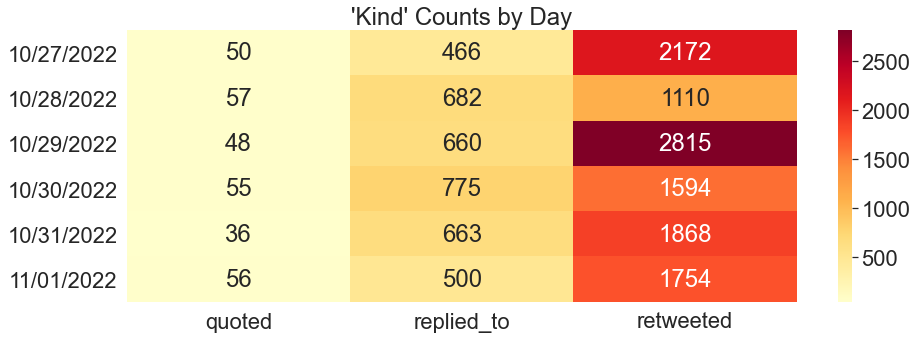

In [7]:
sns.set(font_scale = 2)

figure, ax = plt.subplots(figsize = (15, 5))
ax = sns.heatmap(pd.crosstab(df.TweetCreatedAt, df.Kind, margins = False), annot = True, 
                 cmap = "YlOrRd", fmt = "g")
ax.set(ylabel = None, xlabel = None)
plt.title("'Kind' Counts by Day");

## Top 5 most tweeted tweets

**By day**

In [8]:
days = list(df.TweetCreatedAt.value_counts().index)
for day in sorted(days):
    print(day, ":\n")
    day_ = df[df.TweetCreatedAt == day]
    for key, value in dict(day_.Text.value_counts()[:5]).items():
        print("Tweeted", value, "times", ": ", key)
        print("-" * 40 , "\n")
    print("=" * 80, "\n")

10/27/2022 :

Tweeted 346 times :  RT @eliudkibii Fresh details have emerged regarding the car that was initially reported stolen  prompting the shooting of  journalist #AshrafSharif. The alleged stolen vehicle is a Mercedes Benz Sprinter van KDJ 700F while the one Arshad was travelling in is a Toyota Landcruiser V8 KDJ 200M.1/3
---------------------------------------- 

Tweeted 220 times :  RT @generalrich @raypaxful @Jack_ng01 @PeterObi Mercedes sells status  not cars.  Budweiser sells good times  not beer.  Coca Cola sells happiness  not soft drinks.  Labour Party sells Character  Competence  and Capacity  not a Politician.  The best marketers sell emotions  not items.  #ObiDatti2023
---------------------------------------- 

Tweeted 132 times :  RT @F1DataAnalysis The Red Bull RB18 is the car with the 9th most dominant results  more than the 2020 Mercedes (the fastest race car ever raced) and slightly less than the F2004 #F1  📸 @realDriver61 https://t.co/ZY2Hlolqub
----------------

**Over all**

In [9]:
for key, value in dict(df.Text.value_counts()[:5]).items():
    print("Tweeted", value, "times", ": ", key)
    print("*" * 60 , "\n")

Tweeted 1425 times :  RT @pts The worst cars are named something like “Mercedes-Benz g575S” and cost $110 000 and you see four of them every day. The best cars are named something like “Daihatsu Buddywagon.” They cost $500 in Japan and are illegal anywhere else in the world.
************************************************************ 

Tweeted 878 times :  RT @ScientistRebel1 +++ BREAKING +++  13 members of Scientist Rebellion are currently glued to a car inside a BMW showroom in Munich  demanding the immediate decarbonization of the transport sector. #UniteAgainstClimateFailure (1/10) https://t.co/0QJYEqyfFP
************************************************************ 

Tweeted 659 times :  RT @QasimKhanSuri How did police mistake the Toyota Land Cruiser  a large four-wheel-drive car  for the vehicle reported stolen - a Mercedes-Benz Sprinter  which is a delivery van?  Why did the police not try to demobilise the vehicle by shooting at the tyres? #ArshadSharif https://t.co/ruBY3wgdPu

## Users with the most tweets

In [58]:
# top five users
df.UserName.value_counts()[:10]

happy0shopping     343
sagittarianzee     154
USClassicAutos      74
RamiroandSons       64
UKClassicCars       47
carsandbids         45
GXTZgiEXc8rIZsK     42
MyCarNewsOnlin1     41
AmeenWheels         39
ijerebi             35
Name: UserName, dtype: int64

In [11]:
# user: happy0shopping
for tweet in list(df[df.UserName == "happy0shopping"].Text)[:5]:
    print(tweet, "\n")
    print("*"*60, "\n")

8532732 Motorcycle Tire Pressure Sensor TPMS For BMW K1600GT F700 F800 R1200 GS RT R RS S ST $12.80 click&gt &gt https://t.co/71OlPDcoTv #car #amazon #aliexpress #rt https://t.co/AZ9vBFX5uB 

************************************************************ 

MIB RCD360 PRO Carplay Radio NONAME NEW RCD330 Android Auto for VW Golf 5 6 Jetta MK5 MK6 Tiguan CC Polo Passat 6RD 035 187B $225.99 click&gt &gt https://t.co/ovc17I1tfu #car #amazon #aliexpress #rt https://t.co/CvuSb1Mj1b 

************************************************************ 

Carlinkit MINI CarPlay Box for Audi Mercedes Volvo Volkswagen etc Support Bluetooth Wireless Auto connection charging Siri IOS15 $54.60 click&gt &gt https://t.co/75HX9Eg43y #car #amazon #aliexpress #rt https://t.co/5uU1KD3bvC 

************************************************************ 

NEW RCD330 187B MIB Radio RCD360 PRO NONAME Android Auto Carplay For VW Golf 5 6 Jetta MK5 MK6 Tiguan CC Polo Passat 6RD035187B $225.79 click&gt &gt https://t.co/A29v

Looks like a shop marketing car parts

In [12]:
# user: sagittarianzee
for tweet in list(df[df.UserName == "sagittarianzee"].Text)[:5]:
    print(tweet, "\n")
    print("*"*60, "\n")

https://t.co/kjRchDTzOV  - GM delays EV production ramp over battery supply  -  #cars #car #carsofinstagram #carporn #bmw #auto #carlifestyle #s #carphotography #photography #supercars #ford #jdm #carswithoutlimits #automotive #mercedes #audi... https://t.co/ys0oklhIeM 

************************************************************ 

https://t.co/pD41yS9wwn  - Verstappen breaks record with 2022 F1 Mexican Grand Prix win  -  #cars #car #carsofinstagram #carporn #bmw #auto #carlifestyle #s #carphotography #photography #supercars #ford #jdm #carswithoutlimits #automotive... https://t.co/QUo4Xce0bn 

************************************************************ 

https://t.co/59m0dz9adz  - The Nissan GT-R is back on sale for 2023  -  #cars #car #carsofinstagram #carporn #bmw #auto #carlifestyle #s #carphotography #photography #supercars #ford #jdm #carswithoutlimits #automotive #mercedes #audi... https://t.co/1cO8o11M7U 

************************************************************ 

https:/

In [13]:
# user: USClassicAutos
for tweet in list(df[df.UserName == "USClassicAutos"].Text)[:5]:
    print(tweet, "\n")
    print("*"*60, "\n")

For Sale: 1968 Volkswagen Beetle - Classic https://t.co/wuaIa2KTow &lt --More #classiccar #classiccars https://t.co/1FodevezV2 

************************************************************ 

For Sale: 1969 Volkswagen Beetle - Classic https://t.co/euztq6bhjt &lt --More #classiccar #classiccars https://t.co/5a5cj1Ci1r 

************************************************************ 

For Sale: 1972 Volkswagen Beetle - Classic https://t.co/LQNl2jCGTf &lt --More #classiccar #classiccars https://t.co/NZ9JRKMYbU 

************************************************************ 

For Sale: 2013 Volkswagen Beetle - Classic Turbo https://t.co/pVOT2UGj6n &lt --More #classiccar #classiccars https://t.co/w3aUCFie09 

************************************************************ 

For Sale: 1968 Volkswagen Beetle - Classic Cabriolet https://t.co/GRgcsj7Ubc &lt --More #classiccar #classiccars https://t.co/5eH1xq3nuA 

************************************************************ 



Also looks like some kind of shop

In [14]:
# user: RamiroandSons
for tweet in list(df[df.UserName == "RamiroandSons"].Text)[:5]:
    print(tweet, "\n")
    print("*"*60, "\n")

RT @RdmThingytanK 🔴 LIVE 📡 CLASSIC car repair: '91 volvo 240 / '03 vw golf mk4 / ...   🚗🧰🛠️ https://t.co/PZngIoM2Kl  #DIY #classiccar #cars #twitch  #twitchstreaming #twitchstreamer #live #randomthingytank https://t.co/AVehRUNXmy 

************************************************************ 

RT @UKClassicCars For Sale: Mercedes W124 E250 Diesel https://t.co/aQx9pFerTX &lt --More #classiccar #classiccars https://t.co/zDgxiBmk7D 

************************************************************ 

RT @UKClassicCars For Sale: volkswagen beetle 1300 1971 unfinished project lovely car hard work done https://t.co/edyAZyoSEF &lt --More #classiccar #classiccars https://t.co/s6txitfp0I 

************************************************************ 

RT @UKClassicCars For Sale: Vw beetle project https://t.co/iQQlEy7xPk &lt --More #classiccar #classiccars https://t.co/gaSHDHNR12 

************************************************************ 

RT @UKClassicCars For Sale: volkswagen beetle automatic h

Looks like someone selling calssic cars (link:  https://t.co/edyAZyoSEF)

In [15]:
# user: UKClassicCars
for tweet in (df[df.UserName == "UKClassicCars"].Text)[:5]:
    print(tweet, "\n")
    print("*"*60, "\n")

For Sale: Mercedes W124 E250 Diesel https://t.co/aQx9pFerTX &lt --More #classiccar #classiccars https://t.co/zDgxiBmk7D 

************************************************************ 

For Sale: volkswagen beetle 1300 1971 unfinished project lovely car hard work done https://t.co/edyAZyoSEF &lt --More #classiccar #classiccars https://t.co/s6txitfp0I 

************************************************************ 

For Sale: Vw beetle project https://t.co/iQQlEy7xPk &lt --More #classiccar #classiccars https://t.co/gaSHDHNR12 

************************************************************ 

For Sale: volkswagen beetle automatic https://t.co/P6IHLHxslL &lt --More #classiccar #classiccars https://t.co/5oB6ybd2LO 

************************************************************ 

For Sale: VW Golf mk1 Convertible Clipper classic  amazing clean condition  mint interior https://t.co/mKLvX1wDfl &lt --More #classiccar #classiccars https://t.co/7pA79rR5ff 

*******************************************

The last two users seem to have common tweets

### Analysing the Text

**Things to check:**
* 1. Identify marketing tweets. From the seen above, we can potentially identify marketing tweets base on the number of links in the tweet.
* 2. Check the number of tweets that mention our brands

**Step 1**

In [16]:
def filter_tweets(text):
    '''
    Docstring: 
        - lower case every tweet
        - filter out tweets with two links
    '''
    text_lower = text.lower()
    count_http = text_lower.count("https://")
    if count_http < 2:
        return text_lower
    else:
        return "marketing"

In [17]:
# making a new column with the filtered text
df["Text_Filtered"] = df.Text.swifter.apply(filter_tweets)

In [18]:
# Checking how it worked on 10 samples that belong to a maketing tweet. 
for i in df[df.Text_Filtered == "marketing"].iloc[50:60].Text:
    print(i, "\n")
    print("*"*60, "\n")

RT @ListersMercedes Our growing Mercedes-EQ collection of fully-electric cars offers impressive performance and range  zero local emissions and near-silent driving. Explore the options and see which model best suits your lifestyle at https://t.co/RxoKiPw824. https://t.co/5Dd3ivnR3B 

************************************************************ 

CarlinKit 4.0 Wireless Android Auto CarPlay Adapter CarPlay Dongle Auto Connect for Volkswagen Toyota Honda Audi Benz Mazd $96.31 click&gt &gt https://t.co/1gRV7azjpq #car #amazon #aliexpress #rt https://t.co/eFXCZWigQV 

************************************************************ 

CarlinKit 4.0 Wireless Android Auto CarPlay Adapter Apple CarPlay Dongle Auto Connect For VW Toyota Honda Audi Benz Mazda Fiat $67.19 click&gt &gt https://t.co/y8sLsi9ywR #car #amazon #aliexpress #rt https://t.co/A4fqvs4W9Y 

************************************************************ 

2022 Wireless CarPlay Adapter U2W CarlinKit Wireless CarPlay Dongle for Audi/V

In [29]:
print(f"Total length of the data: {len(df)}\n")
marketing_len = (len(df[df.Text_Filtered != 'marketing']) - len(df)) / len(df[df.Text_Filtered != 'marketing']) * 100
print(f"Number of tweets containing two links: {len(df[df.Text_Filtered == 'marketing'])} ({round(abs(marketing_len), 2)}%)")

Total length of the data: 20622

Number of tweets containing two links: 2725 (15.23%)


**Step 2**

To do:
* remove all except alphabetical characters from the tweet
* identify the brand(s) mentioned in the text

In [46]:
def clean_text(text):
    '''
    Docstring: 
        1. removing the link
        2. removing all except alphabetical characters
        3. tokkanization
        4. removing stop words
    '''
    # 1
    text_ = re.sub('http[s]?://\S+', '', text)
    
    # 2
    text_alpha = re.sub(r"[^a-zA-Z]", " ", text_)
    
    # 3
    text_tokk = word_tokenize(text_alpha)
    
    # 4
    text_clean = [word.lower() for word in text_tokk if word not in stopwords.words("english")]
    
    return text_clean

# creating a column with the clean text
df["Text_Clean"] = df.Text.swifter.apply(clean_text)

In [48]:
# checking brands mentioned in each tweet

def check_brand(text):
    '''
    Docstring:
        1. checking if any brand name from the list above is present in the tweet
    '''
    all_brands = ["bmw", "mercedes", "vw", "volkswagen"]
    
    result = [brand for brand in all_brands if brand in text]
    if len(result) == 0:
        return "No brand(s)"
    else:
        return " ".join(sorted(result))

# creating a column with the mentioned brands for each tweet
df["Mentioned_Brand"] = df.Text_Clean.swifter.apply(check_brand)

In [49]:
df.Mentioned_Brand.value_counts()

mercedes                   10577
bmw                         5747
vw                          1514
volkswagen                  1265
No brand(s)                  792
bmw mercedes                 256
volkswagen vw                176
bmw volkswagen               116
bmw mercedes volkswagen       56
bmw vw                        55
mercedes volkswagen           31
bmw mercedes vw               21
mercedes vw                   12
bmw volkswagen vw              4
Name: Mentioned_Brand, dtype: int64

In [50]:
# Cleaning up the brand names
df.Mentioned_Brand = df.Mentioned_Brand.replace("vw", "volkswagen")
df.Mentioned_Brand = df.Mentioned_Brand.replace("volkswagen vw", "volkswagen")
df.Mentioned_Brand = df.Mentioned_Brand.replace("bmw vw", "bmw volkswagen")
df.Mentioned_Brand = df.Mentioned_Brand.replace("bmw volkswagen vw", "bmw volkswagen")
df.Mentioned_Brand = df.Mentioned_Brand.replace("bmw mercedes vw", "bmw mercedes volkswagen")
df.Mentioned_Brand = df.Mentioned_Brand.replace("mercedes vw", "mercedes volkswagen")

In [51]:
df[df.Text_Filtered != "marketing"].Mentioned_Brand.value_counts()

mercedes                   9914
bmw                        4825
volkswagen                 2142
No brand(s)                 599
bmw volkswagen              169
bmw mercedes                158
bmw mercedes volkswagen      70
mercedes volkswagen          20
Name: Mentioned_Brand, dtype: int64

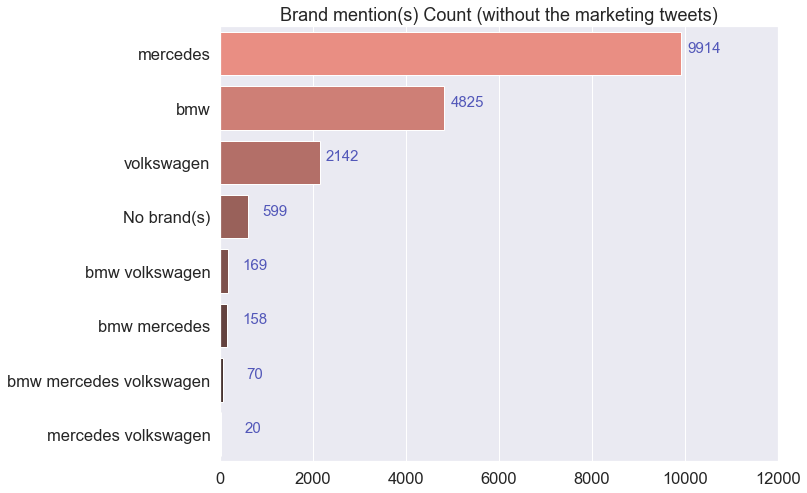

In [52]:
annot_place_1 = 40
annote_place_2 = -20
figure, ax = plt.subplots(figsize = (10, 8))
ax = sns.countplot(data = df[df.Text_Filtered != "marketing"], y = "Mentioned_Brand", palette = "dark:salmon_r", 
                   order = df[df.Text_Filtered != "marketing"].Mentioned_Brand.value_counts().index)
ax.set_xlim(0, 12000)
ax.set(ylabel = None, xlabel = None)
plt.title("Brand mention(s) Count (without the marketing tweets)")
sns.set(font_scale = 1.3)

for p in ax.patches:
    ax.annotate(int(p.get_width()),((p.get_x() + p.get_width()) , p.get_y()), xytext=(annot_place_1, annote_place_2),
                fontsize = 15,color = "#5257B9", textcoords = 'offset points', horizontalalignment = 'right')
        
plt.show();

In [53]:
# checking a few rows that are missing the brand name
for tweet in list(df[df.Mentioned_Brand == "No brand(s)"].Text[:5]):
    print("\n", tweet)
    print
    print("*"*60)


 The car drove over the pavement before crashing into the restaurant  https://t.co/qvpTvUDtyg
************************************************************

 RT @Johnrashton47 Knossington hunt: Woman arrested after anti-hunting activist is hit by car in Leicester   Evening Standard https://t.co/BrgOhtBXJk
************************************************************

 PSA from @BobKronbauer for @BCFerries. Love it.   https://t.co/QW3TZZccNZ
************************************************************

 RT @MercedesBenzUK Take a mountain drive in comfort and style with the CLA Coupé. The sporty design and wide track makes it stand out and also improves the dynamics and stability.  https://t.co/BTLn6c0cSs UK spec may vary. #MBPhotoCredit: Ronja Ramminger with @nari_da (IG) #CLA #MercedesBenzUK https://t.co/TSoE5BdIyh
************************************************************

 RT @MercedesBenzUK The S-Class  not afraid of the limelight.  https://t.co/OvFLpBAn4F UK spec may vary. #SClass

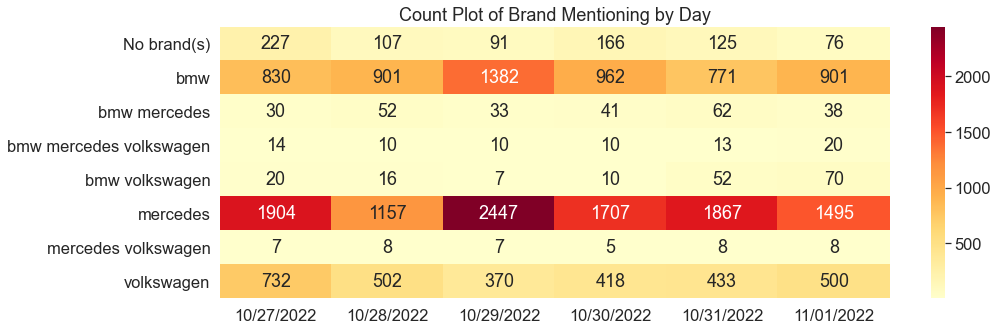

In [54]:
sns.set(font_scale = 1.5)

figure, ax = plt.subplots(figsize = (15, 5))
ax = sns.heatmap(pd.crosstab(df.Mentioned_Brand, df.TweetCreatedAt, margins = False), annot = True, 
                 cmap = "YlOrRd", fmt = "g")
ax.set(ylabel = None, xlabel = None)
plt.title("Count Plot of Brand Mentioning by Day");

In [55]:
## Looking at the `10/29/2022` and `mercedes`
mercedes_29 = df[(df.Mentioned_Brand == "mercedes") & (df.TweetCreatedAt == "10/29/2022")]
basic_info(mercedes_29)

8 features are integer type
0 features are float type
12 features are object type
20 Total features
2447 Observations


,Unique Values,Type,Missing_num,Missing_%
Text,869,Obj,0,0.0%
TweetCreatedAt,1,Obj,0,0.0%
RetweetCount,47,int,0,0.0%
LikeCount,62,int,0,0.0%
ReplyCount,20,int,0,0.0%
AuthorID,2198,int,0,0.0%
ScreenName,2172,Obj,0,0.0%
UserName,2198,Obj,0,0.0%
UserProfile,1638,Obj,603,24.642%
Following,1064,int,0,0.0%


In [57]:
# checking the 5 most tweeted tweeets for mercedes on the 29th
top_5_filtered = list(mercedes_29.Text_Filtered.value_counts().index)
top_5_clean = list(mercedes_29.Text_Clean.value_counts().index)
print(mercedes_29.Text_Filtered.value_counts()[:5].values, "\n")

for i in range(5):
    print("Filtered text: \n", top_5_filtered[i], "\n")
    print("Cleaned text: \n", top_5_clean[i], "\n")
    print("*"*60, "\n")

[604 285 246 106  69] 

Filtered text: 
 rt @qasimkhansuri how did police mistake the toyota land cruiser  a large four-wheel-drive car  for the vehicle reported stolen - a mercedes-benz sprinter  which is a delivery van?  why did the police not try to demobilise the vehicle by shooting at the tyres? #arshadsharif https://t.co/ruby3wgdpu 

Cleaned text: 
 ['rt', 'qasimkhansuri', 'how', 'police', 'mistake', 'toyota', 'land', 'cruiser', 'large', 'four', 'wheel', 'drive', 'car', 'vehicle', 'reported', 'stolen', 'mercedes', 'benz', 'sprinter', 'delivery', 'van', 'why', 'police', 'try', 'demobilise', 'vehicle', 'shooting', 'tyres', 'arshadsharif'] 

************************************************************ 

Filtered text: 
 rt @hamidmirpak important questions. how did police mistake the toyota land cruiser a large four-wheel-drive car for the vehicle reported stolen - a mercedes-benz   which is a delivery van? why did the police not try to demobilise the vehicle by shooting at the tyres